<a href="https://colab.research.google.com/github/Ataerman/CNN_fruit360/blob/main/Keras_funcapi%26Residual_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download selected version
path = kagglehub.dataset_download("moltean/fruits/versions/11")

print("Path to dataset files:", path)

100%|██████████| 964M/964M [00:05<00:00, 175MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/moltean/fruits/versions/11


In [2]:
!cp -r /root/.cache/kagglehub/datasets/moltean/fruits/versions/11 /content/fruits_dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
import glob as glob
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img ,img_to_array

In [4]:
train_path='/content/fruits_dataset/fruits-360_dataset_100x100/fruits-360/Training'
test_path='/content/fruits_dataset/fruits-360_dataset_100x100/fruits-360/Test'

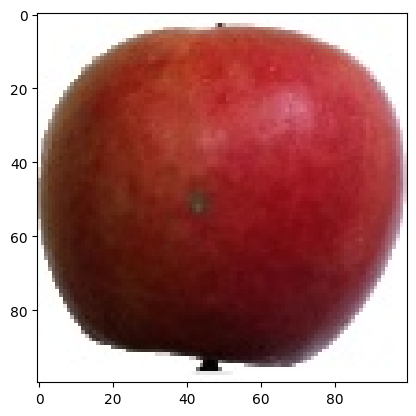

In [5]:
x=load_img('/content/fruits_dataset/fruits-360_dataset_100x100/fruits-360/Training/Apple Crimson Snow 1/157_100.jpg')
plt.imshow(x)
plt.show()

In [6]:
img=img_to_array(x)
img.shape

(100, 100, 3)

In [7]:
classname=glob.glob(train_path+'/*')
noc=len(classname)
print(noc)

141


In [8]:
import tensorflow
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input,Dense,Conv2D,MaxPooling2D,Flatten,Activation,Dropout,BatchNormalization,Add
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [9]:
#Functional API Keras
inputs=Input(shape=(img.shape))

model2=Conv2D(filters=64,kernel_size=(3,3),padding='same')(inputs)
model2=BatchNormalization()(model2)
model2=Activation('relu')(model2)
model2=MaxPooling2D(pool_size=(2,2))(model2)
model2=Dropout(0.01)(model2)


model2=Conv2D(filters=128,kernel_size=(3,3),padding='same')(model2)
model2=BatchNormalization()(model2)
model2=Activation('relu')(model2)
model2=MaxPooling2D(pool_size=(2,2))(model2)
model2=Dropout(0.01)(model2)

model2=Conv2D(filters=256,kernel_size=(3,3),padding='same')(model2)
model2=BatchNormalization()(model2)
model2=Activation('relu')(model2)
model2=MaxPooling2D(pool_size=(2,2))(model2)
model2=Dropout(0.01)(model2)

model2=Conv2D(filters=256,kernel_size=(3,3),padding='same')(model2)
model2=BatchNormalization()(model2)
model2=Activation('relu')(model2)
model2=MaxPooling2D(pool_size=(2,2))(model2)
model2=Dropout(0.01)(model2)

model2=Flatten()(model2)
model2=Dense(512)(model2)
model2=BatchNormalization()(model2)
model2=Activation('relu')(model2)
model2=Dropout(0.01)(model2)
model2=Dense(512)(model2)
model2=BatchNormalization()(model2)
model2=Activation('relu')(model2)
outputs=Dense(noc,activation='softmax')(model2)

model2=Model(inputs=inputs,outputs=outputs)
model2.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

model2.summary()



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 100, 100, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100, 100, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 50, 50, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 25, 25, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,719,10

 Total params: 6,021,901 (22.97 MB)

 Trainable params: 6,018,445 (22.96 MB)

 Non-trainable params: 3,456 (13.50 KB)

In [10]:
#Residual CNN
def residual(model3,filters,kernel_size=3):
    shortcut=model3

    model3=Conv2D(filters,kernel_size=kernel_size,padding='same')(model3)
    model3=BatchNormalization()(model3)
    model3=Activation('relu')(model3)

    model3=Conv2D(filters,kernel_size=kernel_size,padding='same')(model3)
    model3=BatchNormalization()(model3)


    if shortcut.shape[-1]!=filters:
        shortcut=Conv2D(filters,kernel_size=kernel_size,padding='same')(shortcut)
        shortcut=BatchNormalization()(shortcut)


    model3=Add()([model3,shortcut])
    shortcut=Activation('relu')(shortcut)
    return model3

inputs=Input(shape=(img.shape))

model3=Conv2D(filters=64,kernel_size=(3,3),padding='same')(inputs)
model3=BatchNormalization()(model3)
model3=Activation('relu')(model3)
model3=MaxPooling2D(pool_size=(2,2))(model3)
model3=Dropout(0.01)(model3)

model3=residual(model3,filters=64)
model3=MaxPooling2D(pool_size=2)(model3)

model3=residual(model3,filters=128)
model3=MaxPooling2D(pool_size=2)(model3)

model3=residual(model3,filters=128)
model3=MaxPooling2D(pool_size=2)(model3)

model3=Flatten()(model3)
model3=Dense(128,activation='relu')(model3)
outputs=Dense(noc,activation='softmax')(model3)

model3=Model(inputs=inputs,outputs=outputs)

model3.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

model3.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 100, 100,  │      1,792 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 100,  │        256 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_6        │ (None, 100, 100,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 50, 50,    │          0 │ activation_6[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 50, 50,    │          0 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 50, 50,    │     36,928 │ dropout_5[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 50, 50,    │        256 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 50, 50,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 50, 50,    │     36,928 │ activation_7[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 50, 50,    │        256 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 50, 50,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 25, 25,    │          0 │ add[0][0]         │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 25, 25,    │     73,856 │ max_pooling2d_5[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 25, 25,    │        512 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_9        │ (None, 25, 25,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 25, 25,    │    147,584 │ activation_9[0][

 Total params: 1,277,581 (4.87 MB)

 Trainable params: 1,275,917 (4.87 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [11]:
print(model2)
print(model3)

<Functional name=functional, built=True>
<Functional name=functional_1, built=True>


In [12]:
train_datagen=ImageDataGenerator(
    rescale=1./255.0,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)
test_datagen=ImageDataGenerator(
    rescale=1./255.0)
train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(100,100),
    color_mode='rgb',
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)
test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=img.shape[:2],
    color_mode='rgb',
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)

Found 70491 images belonging to 141 classes.
Found 23619 images belonging to 141 classes.


In [13]:
batch_size=32

history2= model2.fit(
    train_generator,
    epochs=50,
    steps_per_epoch=1600 // batch_size,
    validation_data=test_generator,
    validation_steps=800 // batch_size)

history3= model3.fit(
    train_generator,
    epochs=50,
    steps_per_epoch=1600 // batch_size,
    validation_data=test_generator,
    validation_steps=800 // batch_size)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 146ms/step - accuracy: 0.0872 - loss: 4.5095 - val_accuracy: 0.0063 - val_loss: 5.9544
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.2731 - loss: 2.7231 - val_accuracy: 0.0137 - val_loss: 10.1238
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.4177 - loss: 2.1233 - val_accuracy: 0.0188 - val_loss: 11.8383
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.4710 - loss: 1.7713 - val_accuracy: 0.0088 - val_loss: 13.2747
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.5240 - loss: 1.5512 - val_accuracy: 0.0300 - val_loss: 10.6892
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.5718 - loss: 1.4302 - val_accuracy: 0.0562 - val_loss: 10.1717
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.6041 - loss: 1.3060 - val_accuracy: 0.0275 - val_loss: 8.5085
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.6204 - loss: 1.2114 - val_accuracy: 0.0

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8731 - loss: 0.3502 - val_accuracy: 0.6637 - val_loss: 1.1640
Epoch 46/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9053 - loss: 0.2855 - val_accuracy: 0.5575 - val_loss: 2.3247
Epoch 47/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9039 - loss: 0.2858 - val_accuracy: 0.6150 - val_loss: 1.8620
Epoch 48/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9099 - loss: 0.2650 - val_accuracy: 0.7513 - val_loss: 0.9366
Epoch 49/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.9081 - loss: 0.2761 - val_accuracy: 0.7788 - val_loss: 0.7378
Epoch 50/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9006 - loss: 0.2712 - val_accuracy: 0.7538 - val_loss: 0.7109
Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 121ms/step - accuracy: 0.0118 - loss: 6.2237 - val_accuracy: 0.0037 - val_loss: 5.3346
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.0413 - loss: 4.7064 - val_accuracy: 0.0075 - val_lo

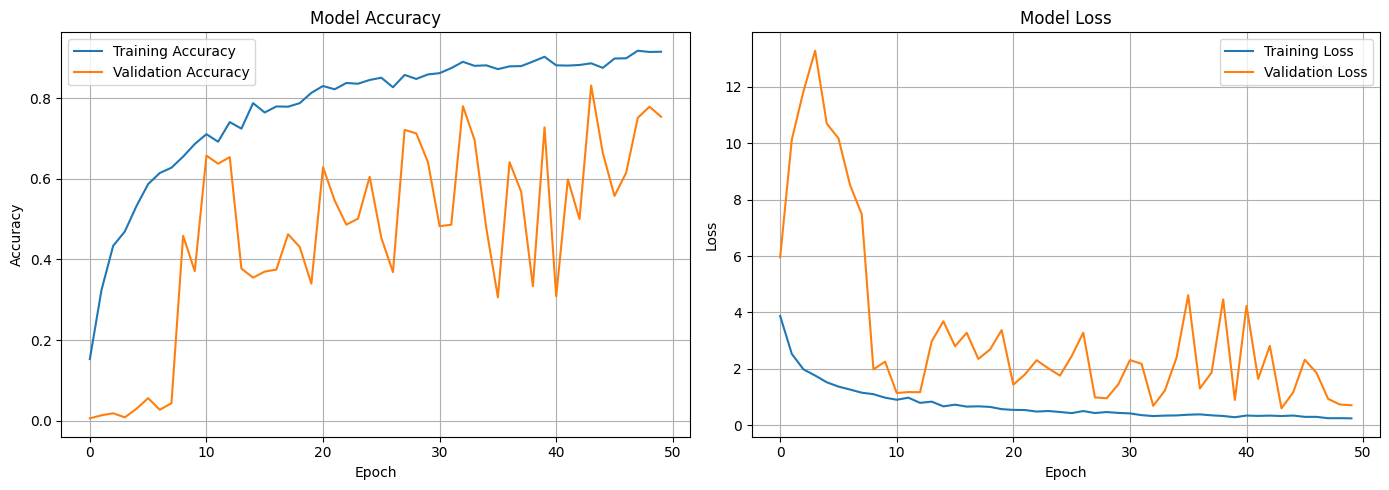

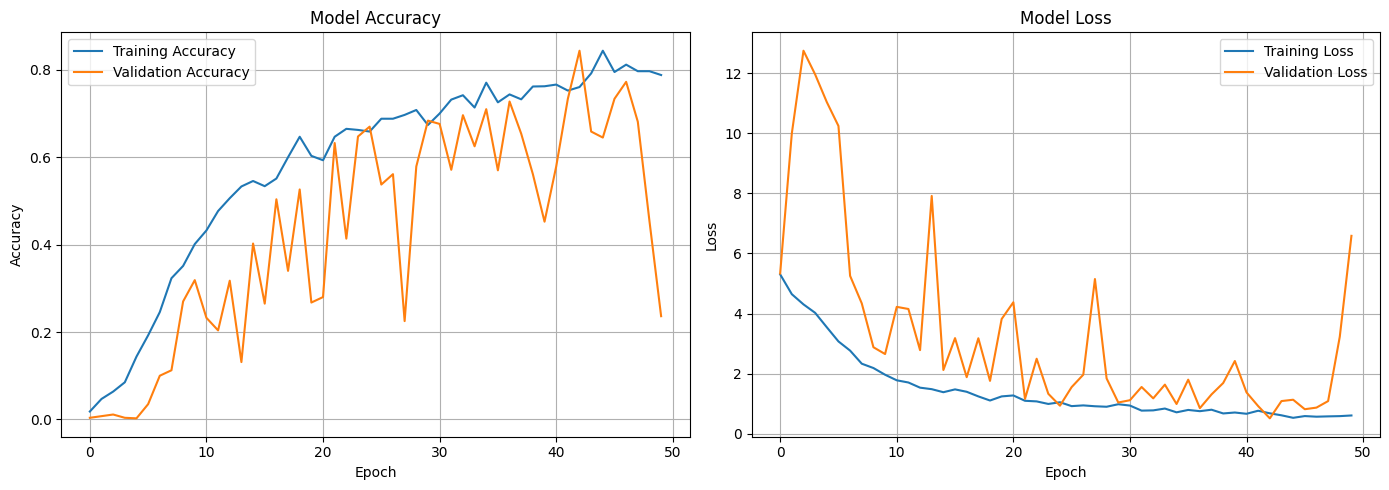

In [14]:
# Training and validation accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Training and validation accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
